In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
from astropy import units as u
from astropy import constants as const

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [2]:
sys.path.append("..")
from dm21cm.dh_wrappers import TransferFunctionWrapper
from dm21cm.utils import load_h5_dict

## lightcone

In [3]:
wdir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/prod_outputs'
os.listdir(wdir)

['elecdecay',
 'inhom_elec_m1e7',
 'fc_xray',
 'archive',
 'inhom_phot_m5e3_lt25',
 'photdecay',
 'elecdecay_hom',
 'inhom_elec_m1e7_lt25_stdastro',
 'inhom_phot_m5e2_lt25',
 'fc_xray_zf002_sf10',
 'elecdecay_zf001',
 'inhom_phot_m5e3_lt25_stdastro',
 'photdecay_hom',
 'bkg',
 'photdecay_zf001',
 'inhom_elec_m1e7_lt25']

In [4]:
import py21cmfast as p21c

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [5]:
with h5py.File(os.path.join(wdir, 'photdecay_zf001/Mass1/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5'), 'r') as f:
    l0 = f['lightcones']['brightness_temp'][()]
    z_s = f['node_redshifts'][()]
with h5py.File(os.path.join(wdir, 'photdecay/Mass1/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5'), 'r') as f:
    l1 = f['lightcones']['brightness_temp'][()]

fid_lc = p21c.LightCone.read(os.path.join(wdir, 'photdecay_zf001/Mass1/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5'))
z_s = np.copy(fid_lc.lightcone_redshifts)

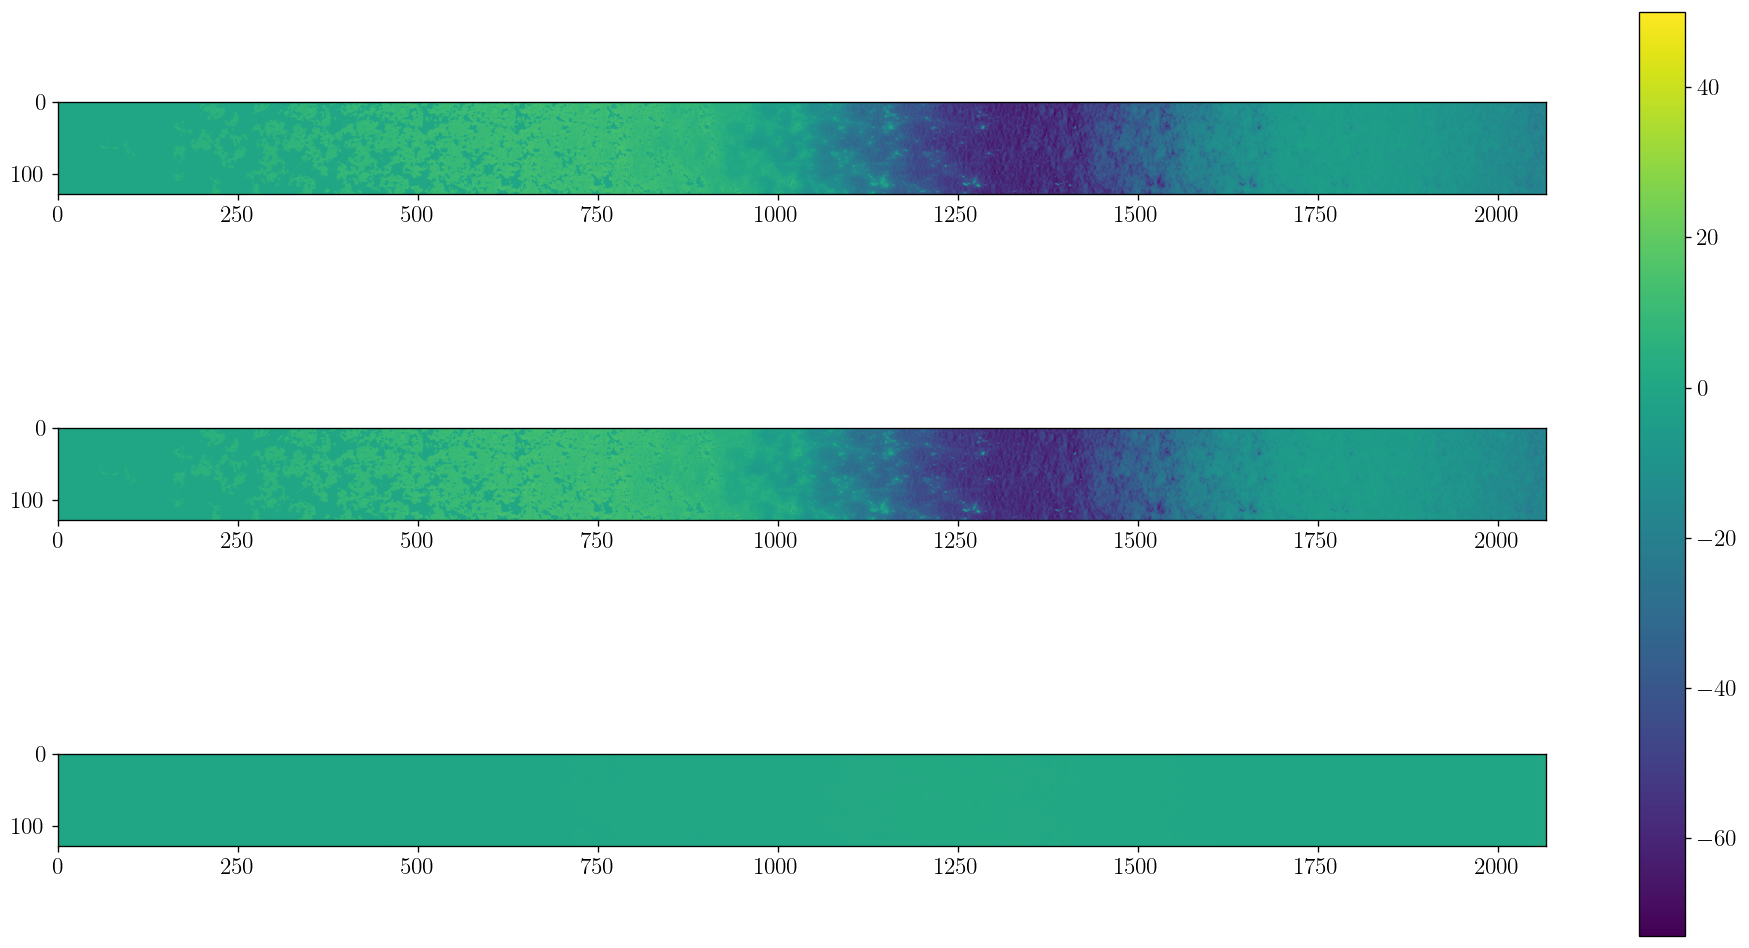

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
vmin = np.min(l0[0,:,:])
#vmax = np.max(l0[0,:,:])
vmax = 50
ax = axs[0]
ax.imshow(l0[0,:,:], vmin=vmin, vmax=vmax)
ax = axs[1]
ax.imshow(l1[0,:,:], vmin=vmin, vmax=vmax)
ax = axs[2]
im = ax.imshow(l1[0,:,:] - l0[0,:,:], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axs)

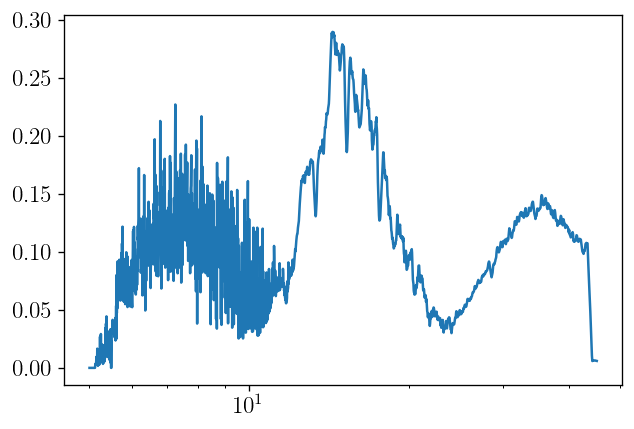

In [7]:
plt.plot(z_s, np.std(l0-l1, axis=(0,1)), label='fid')
plt.xscale('log')

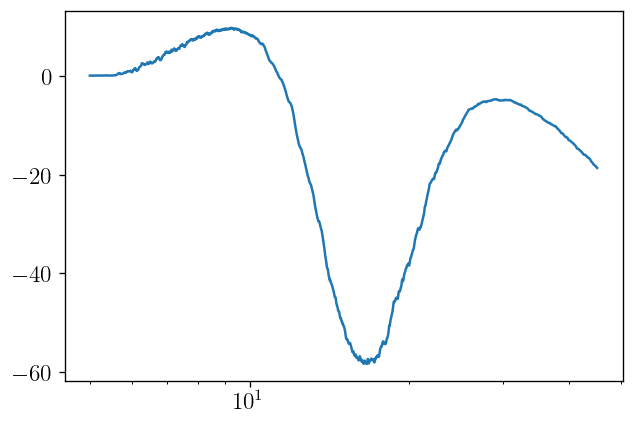

In [30]:
plt.plot(z_s, np.mean(l0, axis=(0,1)), label='fid')
plt.xscale('log')

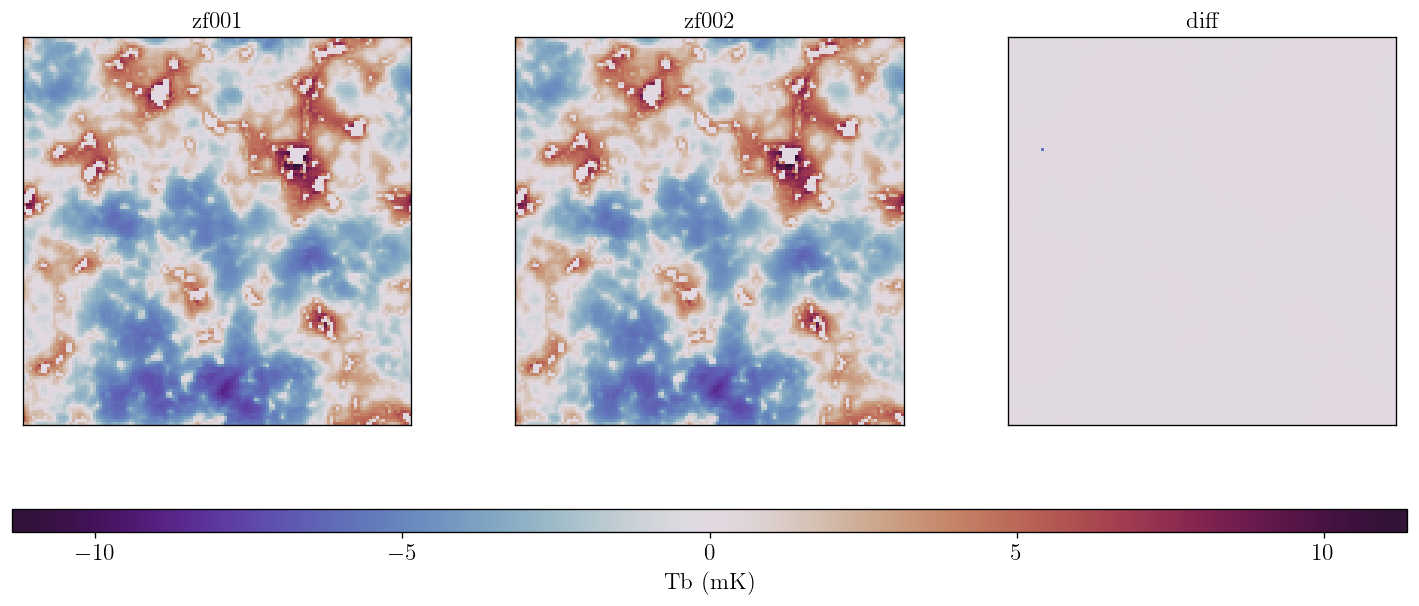

In [6]:
z0 = l0[:,:,1000]
z1 = l1[:,:,1000]
vmax = np.max(np.abs(z0))
vmin = -vmax

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
ax = axs[0]

ax.imshow(z0, cmap='twilight_shifted', vmin=vmin, vmax=vmax)
ax.set(xticks=[], yticks=[], title='zf001')

ax = axs[1]
ax.imshow(z1, cmap='twilight_shifted', vmin=vmin, vmax=vmax)
ax.set(xticks=[], yticks=[], title='zf002')

ax = axs[2]
im = ax.imshow(z0-z1, cmap='twilight_shifted', vmin=vmin, vmax=vmax)
ax.set(xticks=[], yticks=[], title='diff')
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', aspect=60)
cbar.set_label('Tb (mK)')

In [ ]:
fig, ax = plt.subplots(figsize = (14, 10))
plotting.lightcone_sliceplot(l, fig=fig, ax=ax) 

## tf

In [4]:
data_dir = os.environ['DM21CM_DATA_DIR'] + '/tf/zf01/data'
abscs = load_h5_dict(f"{data_dir}/abscissas.h5")
tfw = TransferFunctionWrapper(
    box_dim = 1,
    abscs = abscs,
    prefix = data_dir,
    enable_elec = True,
    on_device = False,
)

In [5]:
tf = tfw.elec_scat_tf.data[5, :, 6, 6, :]

In [6]:
np.log10(np.min(abscs['photE'])), np.log10(np.max(abscs['photE']))

(-3.983254460526338, 12.728793934188179)

/tmp/ipykernel_2565995/1217389320.py:2: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(np.clip(np.abs(tf), 1e-50, None)), origin='lower', extent=[-3.98,12.72, -3.98,12.72], vmin=-10, cmap='rainbow')


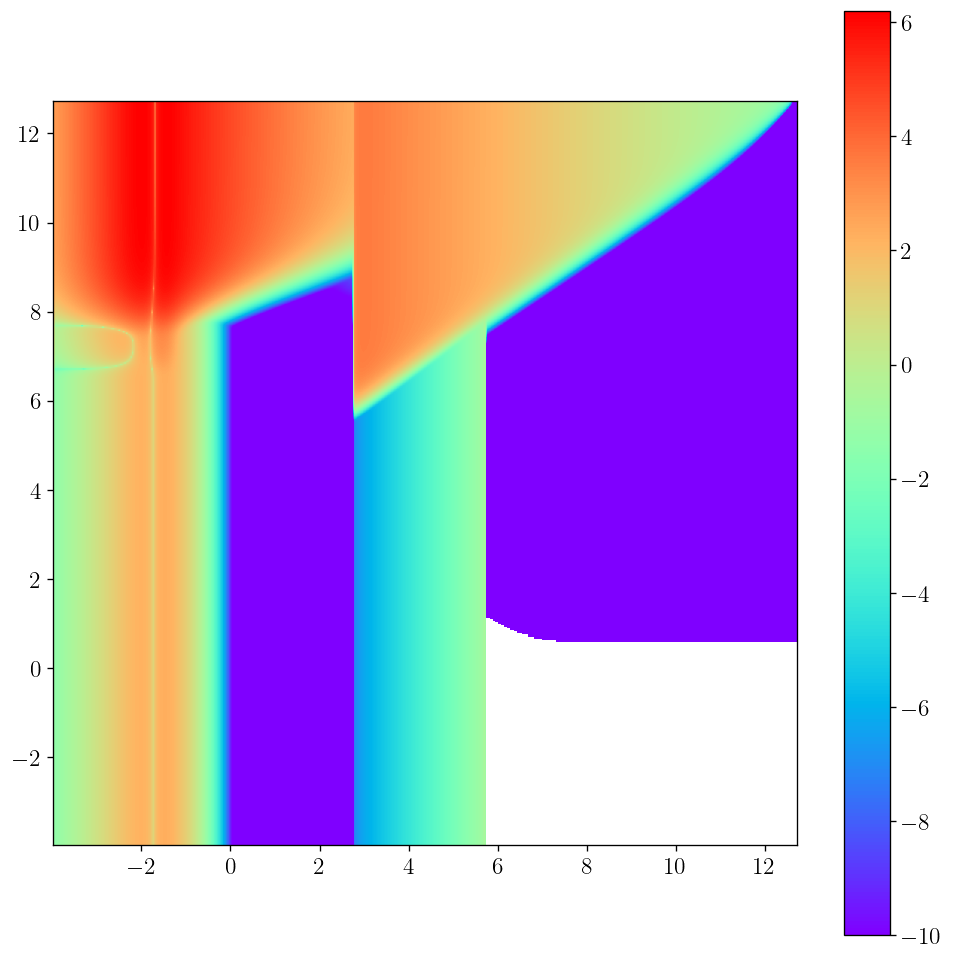

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.log10(np.clip(np.abs(tf), 1e-50, None)), origin='lower', extent=[-3.98,12.72, -3.98,12.72], vmin=-10, cmap='rainbow')
fig.colorbar(im, ax=ax)